## Observations and Insights 

In [1]:
# Observations for Pymaceutical Homework

# 1) The correlation coefficient of .83 is a positive measure between mouse weight and average tumor volume.
# 2) Mouse ID s185 seems to be the most successful trial for drug regimen Capomulin. 
# 3) The tumor volumes increased for drug regimen Zoniferol, Stelasyn, Propriva, Naftisol, and Ketapril
# 4) Placebo increased tumor volume.
# 5) Trial researchers and drug developers should look at the drug elements for Capomulin, Ramicane, 
#    Infubinol, and Ceftamin, since these were the regimens that decreased tumor volume.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
# DataFrames for both files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Display the data table for preview

In [3]:
# Homework Requirement
# Preview the mouse data to see the heading and columns of the dataset

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# Homework Requirement
# Preview the study results to see the heading and columns of the dataset

study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Homework Requirement
# Combine the mouse data and the study results
# Use pd.merge inner join, use the Mouse ID for merge.  The Mouse ID is the unique identifier for both data sets.

mouse_study = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')

In [6]:
# Homework Requirement
# Display the data table for preview

mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Homework Requirement
# Checking the number of mice. Use .nunique()

mouse_id_count = mouse_study["Mouse ID"].nunique()
print("The mice count in the study is " + str(mouse_id_count) + ".")

The mice count in the study is 249.


In [8]:
# Homework Requirement
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. Use duplicated()

mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']).sum()

5

In [9]:
# Homework Requirement
# Optional: Get all the data for the duplicate mouse ID. 
# Note that Mouse ID g989 is the mouse with duplicate timepoints, and only dropping the last timepoint for each 
# duplicate. Mouse ID g989 is still in the dataframe.

mouse_study.loc[mouse_study[['Mouse ID', 'Timepoint']].duplicated(keep='first'), :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Homework Requirement
# Create a clean DataFrame by dropping the duplicate mouse by its ID. Use .drop_duplicates()

clean_mouse_study = mouse_study.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

In [11]:
# Homework Requirement
# Checking the number of mice in the clean DataFrame.
# The mice count is still the same without the duplicated timepoints for Mouse ID g989.

mice_count = clean_mouse_study['Mouse ID'].nunique()
print("The mice count from the clean dataframe is " + str(mice_count) + ".")

The mice count from the clean dataframe is 249.


In [12]:
# Check row counts for clean DataFrame
# Note, that the original row count from mouse_study DataFrame had 1893 rows.
# The new clean DataFrame excludes the duplicate Mouse ID 'g989' of 5 rows.

clean_mouse_study.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

In [13]:
# Preview clean DataFrame

clean_mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary Statistics

In [14]:
# Homework Requirement
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Use groupby () for column Drug Regimen to calculate statistics
drug_regimen = clean_mouse_study.groupby(['Drug Regimen'])

# Mean Drug Regimen
mean_drug_regimen = drug_regimen['Tumor Volume (mm3)'].mean()

# Median Drug Regimen
median_drug_regimen = drug_regimen['Tumor Volume (mm3)'].median()

# Variance Drug Regimen
var_drug_regimen = drug_regimen['Tumor Volume (mm3)'].var()

# Standard Deviation Drug Regimen
std_drug_regimen = drug_regimen['Tumor Volume (mm3)'].std()

# SEM Drug Regimen
sem_drug_regimen = drug_regimen['Tumor Volume (mm3)'].sem()

# Summary Table of Drug Regimen Statistics
stats_drug_regimen = ({"Mean": round(mean_drug_regimen, 2),
                       "Median": round(median_drug_regimen, 2),
                       "Variance": round(var_drug_regimen, 2),
                       "Standard Deviation": round(std_drug_regimen, 2),
                       "SEM": round(sem_drug_regimen, 2),
                       })

labels = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
         'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

summary_drug_regimen = pd.DataFrame(stats_drug_regimen, index=labels)
summary_drug_regimen

,Mean,Median,Variance,Standard Deviation,SEM
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57
Zoniferol,53.24,51.82,48.53,6.97,0.52


## Bar and Pie Charts

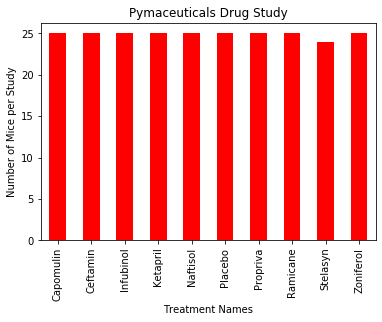

In [15]:
# Homework Requirement
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Select the Drug Regimen and Mouse ID for Bar Plot, groupby Drug Regimen and unique count for Mouse ID
study_group = clean_mouse_study.groupby(['Drug Regimen'])
mouse_countby_study = study_group['Mouse ID'].nunique()

#Bar Plot
mouse_countby_study.plot(kind='bar', facecolor='red')
plt.title("Pymaceuticals Drug Study")
plt.ylabel("Number of Mice per Study")
plt.xlabel("Treatment Names")
plt.show()

In [16]:
# Series to be used for pyplot Bar Chart below for series 'treatment' and 'mouse_number'.
mouse_countby_study

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     25
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

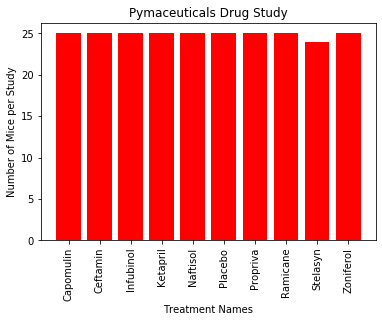

In [17]:
# Homework Requirement
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.


# Create list of treatments for x axis and y axis based on mouse_countby_study series
treatment = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
            'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
mouse_numbers = [25, 25, 25, 25, 25, 25, 25, 25, 24, 25]

x_axis = np.arange(0, len(mouse_numbers))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.xticks(tick_locations, treatment, rotation='vertical')

plt.bar(treatment, mouse_numbers, color='r', alpha=1, align='center')
plt.title("Pymaceuticals Drug Study")
plt.ylabel("Number of Mice per Study")
plt.xlabel("Treatment Names")
plt.show()

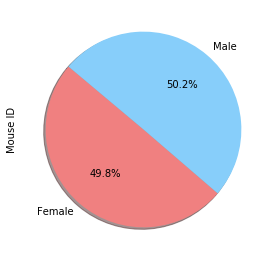

In [18]:
# Homework Requirement
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Groupby sex and use Mouse ID counts for pie plot
pie_study_group = clean_mouse_study.groupby(['Sex'])
pie_mouse_count = pie_study_group['Mouse ID'].nunique()

colors = ['lightcoral', 'lightskyblue'] 
explode = (0, 0)
pie_mouse_count.plot.pie(figsize=(4.5,4.5,), explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()


In [19]:
# Series used to plot pie chart, for series 'label' and 'sizes'.
pie_mouse_count

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

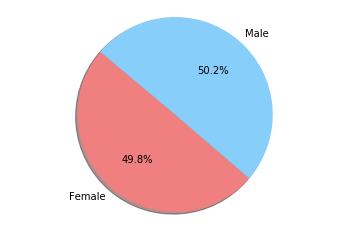

In [20]:
# Homework Requirement
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [124, 125]

colors = ['lightcoral', 'lightskyblue']
explode = (0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Homework Requirement
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [22]:
# Start by getting the last (greatest timepoint for each mouse)
tumor_study = clean_mouse_study.groupby(["Mouse ID"])
mouse_max_timept = tumor_study['Timepoint'].max()

# DataFrame Mouse ID with Greatest Timepoint for each mouse
maxtimept_summary = pd.DataFrame({"Max Timepoint": mouse_max_timept})
maxtimept_summary

,Max Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [23]:
# Merge maxtimept_summary with clean_mouse_study DataFrame
# New merged: tumor_study_df DataFrame with 'Max Timepoint' column added.

tumor_study_df = pd.merge(clean_mouse_study, maxtimept_summary, on='Mouse ID', how='inner')
tumor_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [24]:
# Note: Trouble getting the final Tumor Volumne (mm3), after merge.  Tried to do a 'drop_duplicates' with keep='last', but 
# the Tumor Volume (mm3) values resulted to 0.  Performed a calc on columns Timepoint less Max Timepoint instead.
# Assumption: If Timepoint less Max Timepoint value = 0, then Tumor Volume (mm3) can be kept when loc is used.

# Add new Column "Timepoint less Max Timepoint" to calculate the difference in columns 'Timepoint and 'Max Timepoint',
# the 0 result represents the row with the final tumor size.
# Note this is a meaningless column, it was added just to be able to pull the Final Tumor value for each Mouse ID.

timept_less_maxtime = tumor_study_df["Timepoint"] - tumor_study_df["Max Timepoint"]

tumor_study_df["Timepoint Less Max Timepoint"] = timept_less_maxtime
final_tumor_size = tumor_study_df.loc[tumor_study_df['Timepoint Less Max Timepoint'] == 0, :]
final_tumor_size.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint,Timepoint Less Max Timepoint
9,k403,Ramicane,Male,21,16,45,22.050126,1,45,0
19,s185,Capomulin,Female,3,17,45,23.343598,1,45,0
29,x401,Capomulin,Female,16,15,45,28.484033,0,45,0
39,m601,Capomulin,Male,22,17,45,28.430964,1,45,0
49,g791,Ramicane,Male,11,16,45,29.128472,1,45,0


In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin(c), Ramicane(r), Infubinol(i), and Ceftamin(c)
# New dataframe only contains the Mouse IDs for the 4 Drug Regimens, and only showing valid columns.

cric_study_df = final_tumor_size.loc[(final_tumor_size['Drug Regimen'] == 'Capomulin') | 
                                 (final_tumor_size['Drug Regimen'] == 'Ramicane') | 
                                 (final_tumor_size['Drug Regimen'] == 'Infubinol') |
                                 (final_tumor_size['Drug Regimen'] == 'Ceftamin'), : 'Tumor Volume (mm3)']
cric_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3)
9,k403,Ramicane,Male,21,16,45,22.050126
19,s185,Capomulin,Female,3,17,45,23.343598
29,x401,Capomulin,Female,16,15,45,28.484033
39,m601,Capomulin,Male,22,17,45,28.430964
49,g791,Ramicane,Male,11,16,45,29.128472
...,...,...,...,...,...,...,...
1792,x822,Ceftamin,Male,3,29,45,61.386660
1808,y163,Infubinol,Female,17,27,45,67.685569
1840,y769,Ceftamin,Female,6,27,45,68.594745
1850,y865,Ceftamin,Male,23,26,45,64.729837


In [26]:
# Homework Requirement
# Put treatments into a list for for loop (and later for plot labels)
# Drug Regimen Series by Treatment
capomulin = cric_study_df.loc[cric_study_df["Drug Regimen"] == 'Capomulin', 'Tumor Volume (mm3)']
ramicane = cric_study_df.loc[cric_study_df["Drug Regimen"] == 'Ramicane', 'Tumor Volume (mm3)']
infubinol = cric_study_df.loc[cric_study_df["Drug Regimen"] == 'Infubinol', 'Tumor Volume (mm3)']
ceftamin = cric_study_df.loc[cric_study_df["Drug Regimen"] == 'Ceftamin', 'Tumor Volume (mm3)']

# Create empty list to fill with tumor vol data (for plotting)
# Convert df Series as list for plotting
drug_capomulin = capomulin.tolist()
drug_ramicane = ramicane.tolist()
drug_infubinol = infubinol.tolist()
drug_ceftamin = ceftamin.tolist()

# Sort Treatment lists to determine Outliers, tumor volume (mm3)
drug_capomulin.sort()
drug_ramicane.sort()
drug_infubinol.sort()
drug_ceftamin.sort()

# Calculate the IQR (interquartile range) and quantitatively determine if there are any potential outliers. 
# Capomulin treatment IQR, Lower Bound, Upper Bound
capomulin_data = drug_capomulin
capomulin_q1 = round(np.percentile(capomulin_data, 25, interpolation = 'midpoint'), 2)
capomulin_q3 = round(np.percentile(capomulin_data, 75, interpolation = 'midpoint'), 2)
capomulin_iqr = round((capomulin_q3 - capomulin_q1),2)
cap_lower_bound = round(capomulin_q1 - (1.5*capomulin_iqr), 2)
cap_upper_bound = round(capomulin_q1 + (1.5*capomulin_iqr), 2)

# Ramicane treatment IQR, Lower Bound, Upper Bound
ramicane_data = drug_ramicane
ramicane_q1 = round(np.percentile(ramicane_data, 25, interpolation = 'midpoint'), 2)
ramicane_q3 = round(np.percentile(ramicane_data, 75, interpolation = 'midpoint'), 2)
ramicane_iqr = round((ramicane_q3 - ramicane_q1), 2)
ram_lower_bound = round(ramicane_q1 - (1.5*ramicane_iqr), 2)
ram_upper_bound = round(ramicane_q1 + (1.5*ramicane_iqr), 2)


# Infubinol treatment IQR, Lower Bound, Upper Bound
infubinol_data = drug_infubinol
infubinol_q1 = round(np.percentile(infubinol_data, 25, interpolation = 'midpoint'), 2)
infubinol_q3 = round(np.percentile(infubinol_data, 75, interpolation = 'midpoint'), 2)
infubinol_iqr = round((infubinol_q3 - infubinol_q1), 2)
inf_lower_bound = round(infubinol_q1 - (1.5*infubinol_iqr), 2)
inf_upper_bound = round(infubinol_q1 + (1.5*infubinol_iqr), 2)


# Ceftamin treatment IQR, Lower Bound, Upper Bound
ceftamin_data = drug_ceftamin
ceftamin_q1 = round(np.percentile(ceftamin_data, 25, interpolation = 'midpoint'),2)
ceftamin_q3 = round(np.percentile(ceftamin_data, 75, interpolation = 'midpoint'),2)
ceftamin_iqr = round((ceftamin_q3 - ceftamin_q1), 2)
cef_lower_bound = round(ceftamin_q1 - (1.5*ceftamin_iqr), 2)
cef_upper_bound = round(ceftamin_q1 + (1.5*ceftamin_iqr), 2)


# Locate the rows which contain mice on each drug and get the tumor volumes
mouse_drug_vol = cric_study_df[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]
sort_mouse_drug_vol = mouse_drug_vol.sort_values(['Drug Regimen', 'Tumor Volume (mm3)'])

# For Box plotting get Mouse ID by Drug Regimen and by Tumor Volume (mm3) for each drug regimen
boxplt_capomulin = sort_mouse_drug_vol.loc[sort_mouse_drug_vol['Drug Regimen'] == 'Capomulin']
boxplt_ramicane = sort_mouse_drug_vol.loc[sort_mouse_drug_vol['Drug Regimen'] == 'Ramicane']
boxplt_infubinol = sort_mouse_drug_vol.loc[sort_mouse_drug_vol['Drug Regimen'] == 'Infubinol']
boxplt_ceftamin = sort_mouse_drug_vol.loc[sort_mouse_drug_vol['Drug Regimen'] == 'Ceftamin']

# add subset 
# Determine outliers using upper and lower bounds
# Summary of Quartiles and Outliers
iqr_outliers_data = ({"Interquartile Range ": [str(capomulin_iqr), str(ramicane_iqr), str(infubinol_iqr), str(ceftamin_iqr)],
                       "Lower Bound ": [str(cap_lower_bound), str(ram_lower_bound), str(inf_lower_bound), str(cef_lower_bound)],
                       "Upper Bound ": [str(cap_upper_bound), str(ram_upper_bound), str(inf_upper_bound), str(cef_upper_bound)]
                     })

labels_iqr = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

summary_iqr_outliers = pd.DataFrame(iqr_outliers_data, index=labels_iqr)
summary_iqr_outliers

,Interquartile Range,Lower Bound,Upper Bound
Capomulin,7.78,20.71,44.05
Ramicane,9.1,17.91,45.21
Infubinol,11.48,36.83,71.27
Ceftamin,15.58,25.35,72.09


In [27]:
# Homework Requirement
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

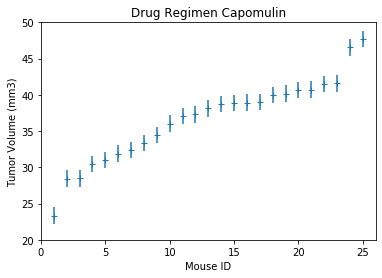

In [28]:
# Boxplot for Drug Regimen Capomulin
# tumor volume (mm3) for Capomulin

# Calculate the SEM for Capomulin to be used for Boxplot
boxcap = pd.DataFrame(boxplt_capomulin)
boxcap_sem = boxcap["Tumor Volume (mm3)"].sem()

mouse_id_capomulin = boxplt_capomulin['Mouse ID']
mouse_id_cap = np.arange(0, len(mouse_id_capomulin), 1) + 1

fig, ax = plt.subplots()
ax.errorbar(mouse_id_cap, drug_capomulin, boxcap_sem, fmt='+')
ax.set_xlim(0, 26) 
ax.set_ylim(20, 50)
ax.set_title('Drug Regimen Capomulin')
ax.set_xlabel('Mouse ID')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

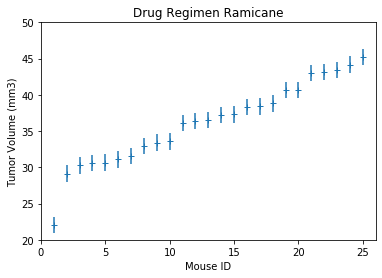

In [29]:
# Boxplot for Drug Regimen Ramicane
# tumor volume (mm3) for Ramicane

# Calculate the SEM for Ramicane to be used for Boxplot
boxram = pd.DataFrame(boxplt_ramicane)
boxram_sem = boxram["Tumor Volume (mm3)"].sem()

mouse_id_ramicane = boxplt_ramicane['Mouse ID']
mouse_id_ram = np.arange(0, len(mouse_id_ramicane), 1) + 1

fig, ax = plt.subplots()
ax.errorbar(mouse_id_ram, drug_ramicane, boxram_sem, fmt='+')
ax.set_xlim(0, 26) 
ax.set_ylim(20, 50)
ax.set_title('Drug Regimen Ramicane')
ax.set_xlabel('Mouse ID')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

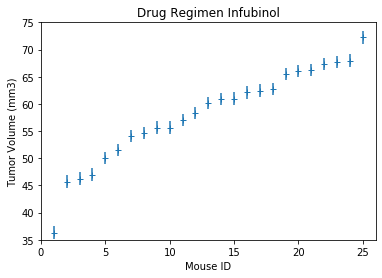

In [30]:
# Boxplot for Drug Regimen Infubinol
# tumor volume (mm3) for Infubinol

# Calculate the SEM for Infubinol to be used for Boxplot
boxinf = pd.DataFrame(boxplt_infubinol)
boxinf_sem = boxram["Tumor Volume (mm3)"].sem()

mouse_id_infubinol = boxplt_infubinol['Mouse ID']
mouse_id_inf = np.arange(0, len(mouse_id_infubinol), 1) + 1

fig, ax = plt.subplots()
ax.errorbar(mouse_id_inf, drug_infubinol, boxinf_sem, fmt='+')
ax.set_xlim(0, 26) 
ax.set_ylim(35, 75)
ax.set_title('Drug Regimen Infubinol')
ax.set_xlabel('Mouse ID')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

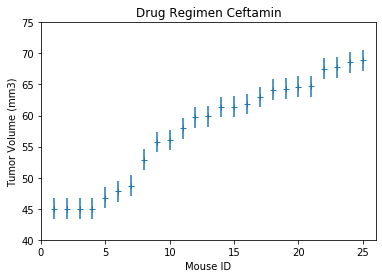

In [31]:
# Boxplot for Drug Regimen Ceftamin
# tumor volume (mm3) for Ceftamin

# Calculate the SEM for Ceftamin to be used for Boxplot
boxcef = pd.DataFrame(boxplt_ceftamin)
boxcef_sem = boxcef["Tumor Volume (mm3)"].sem()

mouse_id_ceftamin = boxplt_ceftamin['Mouse ID']
mouse_id_cef = np.arange(0, len(mouse_id_ceftamin), 1) + 1

fig, ax = plt.subplots()
ax.errorbar(mouse_id_cef, drug_ceftamin, boxcef_sem, fmt='+')
ax.set_xlim(0, 26) 
ax.set_ylim(40, 75)
ax.set_title('Drug Regimen Ceftamin')
ax.set_xlabel('Mouse ID')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [32]:
# Homework Requirement
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Notes: Use the clean_mouse_study DataFrame which has the origial Mouse ID counts with all columns

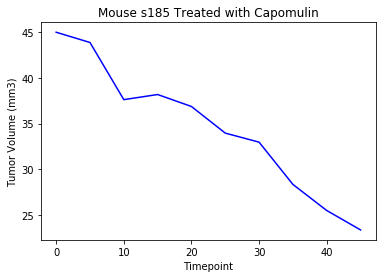

In [33]:
# Select mouse id s185 for plotting

mouse_s185 = clean_mouse_study.loc[clean_mouse_study['Mouse ID'] == 's185', :]

s185_x_axis = mouse_s185['Timepoint']
s185_y_axis = mouse_s185['Tumor Volume (mm3)']

s185_lineplt, = plt.plot(s185_x_axis, s185_y_axis, color='blue')
plt.title('Mouse s185 Treated with Capomulin')
plt.xlabel("Timepoint")
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [34]:
# Create dataframe that includes the Average Tumor Volume by Mouse ID
# Use this same dataframe for the Correlation Coefficient and Linear Regression Model

corr_capomulin = clean_mouse_study.loc[clean_mouse_study['Drug Regimen'] == 'Capomulin', :]
corr_groupby_mouse = corr_capomulin.groupby('Mouse ID')
corr_avg_tumor = corr_groupby_mouse['Tumor Volume (mm3)'].mean()

corr_cap_summary = pd.DataFrame({"Avg Tumor Volume": corr_avg_tumor})

In [35]:
# Merge the average tumor volume with existing dataframe for reporting
capomulin_correlation = pd.merge(corr_capomulin, corr_cap_summary, on='Mouse ID', how='inner')

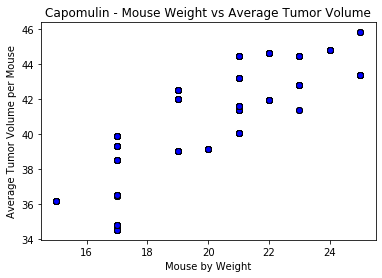

In [36]:
# Homework Requirement
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

x_values = capomulin_correlation['Weight (g)']
y_values = capomulin_correlation['Avg Tumor Volume']

plt.scatter(x_values, y_values, marker='o', facecolor='blue', edgecolors='black')
plt.title('Capomulin - Mouse Weight vs Average Tumor Volume')
plt.xlabel('Mouse by Weight')
plt.ylabel("Average Tumor Volume per Mouse")
plt.show()

## Correlation and Regression

In [37]:
# Homework Requirement
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [38]:
# Calculation the correlation coefficient by weight and average tumor volume

mouse_weight_corr = capomulin_correlation.iloc[:, 4]
avg_tumor_corr = capomulin_correlation.iloc[:, 8]
correlation = st.pearsonr(mouse_weight_corr, avg_tumor_corr)

print(f"The correlation between weight and average tumor is {round(correlation[0],2)}")

The correlation between weight and average tumor is 0.83


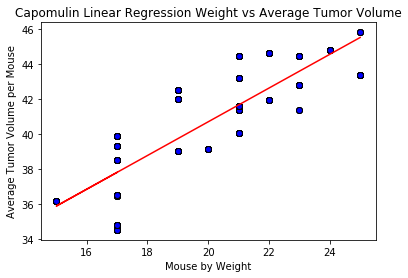

In [39]:
# Linear Regression Model 
x_values = capomulin_correlation['Weight (g)']
y_values = capomulin_correlation['Avg Tumor Volume']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values, y_values, marker='o', facecolor='blue', edgecolors='black')
plt.plot(x_values, regress_values, 'r-')
plt.title('Capomulin Linear Regression Weight vs Average Tumor Volume')
plt.xlabel('Mouse by Weight')
plt.ylabel("Average Tumor Volume per Mouse")
plt.show()